In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Data Overview

In [2]:
column_names = [
    "x",
    "z",
    "r",
    "theta",
    "alpha",
    "psi",
    "q",
    "betak",
    "betat",
    "dbetatdr",
    "dbetatdt",
    "He",
    "Hf",
    "Omega",
    "b2",
    "rho",
]
df_2d_100k = pd.read_csv("/data/sjammi6/thesisproject/data/October_15_2024_22-05/2D_data_100000/all_vars.dat", delimiter=r"\s+", header=None, names=column_names)
df_2d_10k = pd.read_csv("/data/sjammi6/thesisproject/data/October_15_2024_22-05/2D_data/all_vars.dat", delimiter=r"\s+", header=None, names=column_names)
df_2d_1k = pd.read_csv("/data/sjammi6/thesisproject/data/October_08_2024_22-13/2D_data/all_vars.dat", delimiter=r"\s+", header=None, names=column_names)

In [3]:
df_3d = pd.read_hdf("/data/sjammi6/thesisproject/data/October_08_2024_22-13/3D_data/all_data_updated_jacobian.h5", key="df")
df_3d

,r,theta,phi,alpha,beta__x,beta__y,beta__z,psi,gxx,gxy,...,Kyy,Kyz,Kzz,rho,u__x,u__y,u__z,A_x,A_y,A_z
0,0.300000,0.000000,0.000000,0.00000,-2.409219e-01,0.000000e+00,-0.0,2.447883,35.905663,0.000000e+00,...,0.000000e+00,0.000000e+00,0.0,0.0,0.0,-0.0,0.0,0.000000e+00,0.000000e+00,0.0
1,0.300000,0.000000,0.063467,0.00000,-2.409219e-01,0.000000e+00,-0.0,2.447883,35.905663,0.000000e+00,...,0.000000e+00,0.000000e+00,0.0,0.0,0.0,-0.0,0.0,0.000000e+00,0.000000e+00,0.0
2,0.300000,0.000000,0.126933,0.00000,-2.409219e-01,0.000000e+00,-0.0,2.447883,35.905663,0.000000e+00,...,0.000000e+00,0.000000e+00,0.0,0.0,0.0,-0.0,0.0,0.000000e+00,0.000000e+00,0.0
3,0.300000,0.000000,0.190400,0.00000,-2.409219e-01,0.000000e+00,-0.0,2.447883,35.905663,0.000000e+00,...,0.000000e+00,0.000000e+00,0.0,0.0,0.0,-0.0,0.0,0.000000e+00,0.000000e+00,0.0
4,0.300000,0.000000,0.253866,0.00000,-2.409219e-01,0.000000e+00,-0.0,2.447883,35.905663,0.000000e+00,...,0.000000e+00,0.000000e+00,0.0,0.0,0.0,-0.0,0.0,0.000000e+00,0.000000e+00,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64761196,0.000052,1.570796,6.092786,-0.99906,-7.606844e-26,7.156935e-13,-0.0,1.000470,1.001882,1.351214e-07,...,1.145235e-10,9.789670e-26,0.0,0.0,-0.0,0.0,-0.0,-6.746229e-08,-3.500276e-07,0.0
64761197,0.000052,1.570796,6.156252,-0.99906,-7.606844e-26,7.156935e-13,-0.0,1.000470,1.001882,9.130724e-08,...,5.176602e-11,9.889629e-26,0.0,0.0,-0.0,0.0,-0.0,-4.512635e-08,-3.536016e-07,0.0
64761198,0.000052,1.570796,6.219719,-0.99906,-7.606844e-26,7.156935e-13,-0.0,1.000470,1.001882,4.602389e-08,...,1.307278e-11,9.949765e-26,0.0,0.0,-0.0,0.0,-0.0,-2.260869e-08,-3.557518e-07,0.0
64761199,0.000052,1.570796,6.283185,-0.99906,-7.606844e-26,7.156935e-13,-0.0,1.000470,1.001882,1.780928e-22,...,1.953525e-40,9.969838e-26,0.0,0.0,-0.0,0.0,-0.0,-8.730984e-23,-3.564695e-07,0.0


In [4]:
import os
import pathlib 
dataframes = []
for f in pathlib.Path("/data/sjammi6/thesisproject/data/October_08_2024_22-13/processed_grids/dataframes/").glob("*.h5"):
    dataframes.append(str(f))
dataframes = [pd.read_hdf(f, key="df") for f in dataframes]
df_interpolated = pd.concat(dataframes, axis=0, ignore_index=True)
df_interpolated

,x,y,z,alpha,beta__x,beta__y,beta__z,psi,gxx,gxy,...,Kyy,Kyz,Kzz,rho,u__x,u__y,u__z,A_x,A_y,A_z
0,-371.199,-240.0,224.0,0.997298,-2.400759e-08,9.576547e-11,0.0,1.001353,1.005393,-0.000021,...,-3.234391e-08,-2.583138e-08,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,-367.999,-240.0,224.0,0.997274,-2.499721e-08,9.928888e-11,0.0,1.001365,1.005441,-0.000021,...,-3.406379e-08,-2.668654e-08,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,-364.799,-240.0,224.0,0.997271,-2.508994e-08,9.972229e-11,0.0,1.001367,1.005447,-0.000022,...,-3.467091e-08,-2.668010e-08,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,-361.599,-240.0,224.0,0.997249,-2.605839e-08,1.031126e-10,0.0,1.001378,1.005492,-0.000022,...,-3.568156e-08,-2.764375e-08,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,-358.399,-240.0,224.0,0.997242,-2.627327e-08,1.041139e-10,0.0,1.001381,1.005505,-0.000022,...,-3.602187e-08,-2.785429e-08,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103692343,7.801,10.4,15.4,0.934816,-3.616487e-04,1.513224e-05,0.0,1.034097,1.142709,-0.001118,...,1.166138e-04,1.912323e-04,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
103692344,8.001,10.4,15.4,0.935230,-3.547975e-04,1.493719e-05,0.0,1.033870,1.141616,-0.001147,...,1.147237e-04,2.003554e-04,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
103692345,8.201,10.4,15.4,0.935256,-3.541472e-04,1.494419e-05,0.0,1.033856,1.141520,-0.001158,...,1.140853e-04,2.041228e-04,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
103692346,8.401,10.4,15.4,0.935493,-3.498332e-04,1.486465e-05,0.0,1.033726,1.140938,-0.001165,...,1.149820e-04,2.043763e-04,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [5]:
df_3d_withoutdups = df_3d.drop_duplicates()
df_3d_withoutdups

,r,theta,phi,alpha,beta__x,beta__y,beta__z,psi,gxx,gxy,...,Kyy,Kyz,Kzz,rho,u__x,u__y,u__z,A_x,A_y,A_z
0,0.300000,0.000000,0.000000,0.00000,-2.409219e-01,0.000000e+00,-0.0,2.447883,35.905663,0.000000e+00,...,0.000000e+00,0.000000e+00,0.0,0.0,0.0,-0.0,0.0,0.000000e+00,0.000000e+00,0.0
1,0.300000,0.000000,0.063467,0.00000,-2.409219e-01,0.000000e+00,-0.0,2.447883,35.905663,0.000000e+00,...,0.000000e+00,0.000000e+00,0.0,0.0,0.0,-0.0,0.0,0.000000e+00,0.000000e+00,0.0
2,0.300000,0.000000,0.126933,0.00000,-2.409219e-01,0.000000e+00,-0.0,2.447883,35.905663,0.000000e+00,...,0.000000e+00,0.000000e+00,0.0,0.0,0.0,-0.0,0.0,0.000000e+00,0.000000e+00,0.0
3,0.300000,0.000000,0.190400,0.00000,-2.409219e-01,0.000000e+00,-0.0,2.447883,35.905663,0.000000e+00,...,0.000000e+00,0.000000e+00,0.0,0.0,0.0,-0.0,0.0,0.000000e+00,0.000000e+00,0.0
4,0.300000,0.000000,0.253866,0.00000,-2.409219e-01,0.000000e+00,-0.0,2.447883,35.905663,0.000000e+00,...,0.000000e+00,0.000000e+00,0.0,0.0,0.0,-0.0,0.0,0.000000e+00,0.000000e+00,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64761096,0.000052,1.573296,6.092786,-0.99906,3.105730e-12,7.156913e-13,-0.0,1.000470,1.001882,1.351206e-07,...,1.137467e-10,-3.969837e-12,0.0,0.0,0.0,0.0,-0.0,-6.761338e-08,-3.508115e-07,0.0
64761097,0.000052,1.573296,6.156252,-0.99906,3.105730e-12,7.156913e-13,-0.0,1.000470,1.001882,9.130667e-08,...,5.141488e-11,-4.010371e-12,0.0,0.0,0.0,0.0,-0.0,-4.522741e-08,-3.543935e-07,0.0
64761098,0.000052,1.573296,6.219719,-0.99906,3.105730e-12,7.156913e-13,-0.0,1.000470,1.001882,4.602360e-08,...,1.298411e-11,-4.034757e-12,0.0,0.0,0.0,0.0,-0.0,-2.265933e-08,-3.565485e-07,0.0
64761099,0.000052,1.573296,6.283185,-0.99906,3.105730e-12,7.156913e-13,-0.0,1.000470,1.001882,1.780917e-22,...,-1.982030e-37,-4.042897e-12,0.0,0.0,0.0,0.0,-0.0,-8.750538e-23,-3.572678e-07,0.0


In [6]:
print(len(df_3d_withoutdups))
print(len(df_3d))
print(len(df_3d) - len(df_3d_withoutdups))

64600901
64761201
160300


In [7]:
df_3d_withoutdupsv2 = df_3d.drop_duplicates(subset=["r", "theta", "phi"], keep="last")
print(len(df_3d_withoutdupsv2))
print(len(df_3d))
print(len(df_3d) - len(df_3d_withoutdupsv2))

64600901
64761201
160300


In [8]:
df_interpolated_xplane = df_interpolated[
    (df_interpolated.y >= np.float64(-0.0001)) & 
    (df_interpolated.y <= np.float64(0.0001)) & 
    (df_interpolated.z >= np.float64(-0.0001)) & 
    (df_interpolated.z <= np.float64(0.0001))
]

df_interpolated_xplane = df_interpolated_xplane.sort_values(['x', 'y', 'z'])

In [9]:
df_2d_1k["phi"] = np.float64(0.0)
df_2d_1k["y"] = np.float64(0.0)
df_2d_1k["gxx"] = (df_2d_1k.psi**4 * np.exp(2 * df_2d_1k.q)) * (
    ((df_2d_1k.x / df_2d_1k.r) ** 2) + ((df_2d_1k.z * np.cos(df_2d_1k.phi) / df_2d_1k.r) ** 2)
) + np.sin(df_2d_1k.phi) ** 2 * df_2d_1k.psi**4
df_2d_1k["gxy"] = (
    df_2d_1k.psi**4
    * np.exp(2 * df_2d_1k.q)
    * (df_2d_1k.x * df_2d_1k.y / df_2d_1k.r**2 + df_2d_1k.z**2 * np.cos(df_2d_1k.phi) * np.sin(df_2d_1k.phi) / df_2d_1k.r**2)
    - np.sin(df_2d_1k.phi) * np.cos(df_2d_1k.phi) * df_2d_1k.psi**4
)
df_2d_1k["gxz"] = (
    df_2d_1k.psi**4
    * np.exp(2 * df_2d_1k.q)
    * (
        df_2d_1k.x * df_2d_1k.z / df_2d_1k.r**2
        - df_2d_1k.z * np.cos(df_2d_1k.phi) * np.sqrt(df_2d_1k.x**2 + df_2d_1k.y**2) / df_2d_1k.r**2
    )
)
df_2d_1k["gyy"] = (
    df_2d_1k.psi**4
    * np.exp(2 * df_2d_1k.q)
    * (df_2d_1k.y**2 / df_2d_1k.r**2 + df_2d_1k.z**2 * np.sin(df_2d_1k.phi) ** 2 / df_2d_1k.r**2)
    + np.cos(df_2d_1k.phi) ** 2 * df_2d_1k.psi**4
)
df_2d_1k["gyz"] = (
    df_2d_1k.psi**4
    * np.exp(2 * df_2d_1k.q)
    * (
        df_2d_1k.y * df_2d_1k.z / df_2d_1k.r**2
        - df_2d_1k.z * np.sin(df_2d_1k.phi) * np.sqrt(df_2d_1k.x**2 + df_2d_1k.y**2) / df_2d_1k.r**2
    )
)
df_2d_1k["gzz"] = (
    df_2d_1k.psi**4 * np.exp(2 * df_2d_1k.q) * (df_2d_1k.x**2 + df_2d_1k.y**2) / df_2d_1k.r**2
    + df_2d_1k.psi**4 * np.exp(2 * df_2d_1k.q) * df_2d_1k.z**2 / df_2d_1k.r**2
)
df_2d_1k_new_xplane = df_2d_1k[((df_2d_1k.theta == dict(df_2d_1k.theta.describe())["max"])) & (df_2d_1k.phi == np.float64(0))]
df_2d_1k_new_xplane


,x,z,r,theta,alpha,psi,q,betak,betat,dbetatdr,...,b2,rho,phi,y,gxx,gxy,gxz,gyy,gyz,gzz
201,0.300000,1.836970e-17,0.300000,1.570796,0.000000,2.584690,-2.229246e-01,-2.439095e-01,0.000000e+00,0.000000e+00,...,0.0,0.0,0.0,0.0,28.576176,0.0,0.0,44.630729,0.0,28.576176
403,0.306000,1.873710e-17,0.306000,1.570796,0.005928,2.559279,-2.228867e-01,-2.438719e-01,-1.625784e-09,-2.178258e-06,...,0.0,0.0,0.0,0.0,27.470965,0.0,0.0,42.901340,0.0,27.470965
605,0.312060,1.910816e-17,0.312060,1.570796,0.011799,2.534459,-2.227776e-01,-2.437601e-01,-2.653671e-08,-1.103360e-05,...,0.0,0.0,0.0,0.0,26.426458,0.0,0.0,41.261129,0.0,26.426458
807,0.318181,1.948294e-17,0.318181,1.570796,0.017616,2.510210,-2.226034e-01,-2.435761e-01,-1.370537e-07,-3.356178e-05,...,0.0,0.0,0.0,0.0,25.438355,0.0,0.0,39.704516,0.0,25.438355
1009,0.324362,1.986147e-17,0.324362,1.570796,0.023381,2.486511,-2.223671e-01,-2.433220e-01,-4.419148e-07,-5.548362e-05,...,0.0,0.0,0.0,0.0,24.502800,0.0,0.0,38.226215,0.0,24.502800
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
161195,1668.046118,1.021384e-13,1668.046118,1.570796,0.999030,1.000485,-7.824532e-07,-3.866588e-11,-1.337280e-09,1.493274e-12,...,0.0,0.0,0.0,0.0,1.001941,0.0,0.0,1.001943,0.0,1.001941
161397,1684.729579,1.031599e-13,1684.729579,1.570796,0.999037,1.000482,-6.774198e-07,-2.856271e-11,-1.312794e-09,1.441696e-12,...,0.0,0.0,0.0,0.0,1.001927,0.0,0.0,1.001928,0.0,1.001927
161599,1701.579875,1.041917e-13,1701.579875,1.570796,0.999045,1.000478,-5.725143e-07,-1.875644e-11,-1.288898e-09,1.395197e-12,...,0.0,0.0,0.0,0.0,1.001912,0.0,0.0,1.001913,0.0,1.001912
161801,1718.598674,1.052338e-13,1718.598674,1.570796,0.999052,1.000474,-4.676996e-07,-9.238360e-12,-1.265504e-09,1.361408e-12,...,0.0,0.0,0.0,0.0,1.001897,0.0,0.0,1.001898,0.0,1.001897


In [10]:
df_3d_xplane = df_3d[(df_3d.theta == dict(df_3d.theta.describe())["50%"]) & (df_3d.phi == dict(df_3d.phi.describe())["min"])]
df_3d_xplane = df_3d_xplane.sort_values(by="r").drop_duplicates()
df_3d_xplane.sort_values(by="r")
df_3d_xplane

,r,theta,phi,alpha,beta__x,beta__y,beta__z,psi,gxx,gxy,...,Kyy,Kyz,Kzz,rho,u__x,u__y,u__z,A_x,A_y,A_z
64761100,0.000052,1.570796,0.0,-0.999060,-7.606844e-26,7.156935e-13,-0.0,1.000470,1.001882,0.0,...,0.0,9.969838e-26,0.0,0.0,-0.0,0.0,-0.0,0.0,-3.564695e-07,0.0
48560700,0.000052,1.570796,0.0,-0.999052,-7.805547e-26,7.417337e-13,-0.0,1.000474,1.001897,0.0,...,0.0,1.007610e-25,0.0,0.0,-0.0,0.0,-0.0,0.0,-3.600348e-07,0.0
64720700,0.000053,1.570796,0.0,-0.999045,-8.007074e-26,7.684943e-13,-0.0,1.000478,1.001912,0.0,...,0.0,1.026929e-25,0.0,0.0,-0.0,0.0,-0.0,0.0,-3.636358e-07,0.0
64700500,0.000053,1.570796,0.0,-0.999037,-8.213442e-26,7.961853e-13,-0.0,1.000482,1.001927,0.0,...,0.0,1.052809e-25,0.0,0.0,-0.0,0.0,-0.0,0.0,-3.672728e-07,0.0
48500100,0.000054,1.570796,0.0,-0.999030,-8.425241e-26,8.248851e-13,-0.0,1.000485,1.001941,0.0,...,0.0,1.081161e-25,0.0,0.0,-0.0,0.0,-0.0,0.0,-3.709462e-07,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16119500,1668.046118,1.570796,0.0,0.999030,-8.425241e-26,8.248851e-13,-0.0,1.000485,1.001941,0.0,...,0.0,1.081161e-25,0.0,0.0,0.0,-0.0,0.0,0.0,-3.709462e-07,0.0
32340100,1684.729579,1.570796,0.0,0.999037,-8.213442e-26,7.961853e-13,-0.0,1.000482,1.001927,0.0,...,0.0,1.052809e-25,0.0,0.0,0.0,-0.0,0.0,0.0,-3.672728e-07,0.0
16159900,1701.579875,1.570796,0.0,0.999045,-8.007074e-26,7.684943e-13,-0.0,1.000478,1.001912,0.0,...,0.0,1.026929e-25,0.0,0.0,0.0,-0.0,0.0,0.0,-3.636358e-07,0.0
16180100,1718.598674,1.570796,0.0,0.999052,-7.805547e-26,7.417337e-13,-0.0,1.000474,1.001897,0.0,...,0.0,1.007610e-25,0.0,0.0,0.0,-0.0,0.0,0.0,-3.600348e-07,0.0


In [11]:
df_3d.columns

Index(['r', 'theta', 'phi', 'alpha', 'beta__x', 'beta__y', 'beta__z', 'psi',
       'gxx', 'gxy', 'gxz', 'gyy', 'gyz', 'gzz', 'Kxx', 'Kxy', 'Kxz', 'Kyy',
       'Kyz', 'Kzz', 'rho', 'u__x', 'u__y', 'u__z', 'A_x', 'A_y', 'A_z'],
      dtype='object')

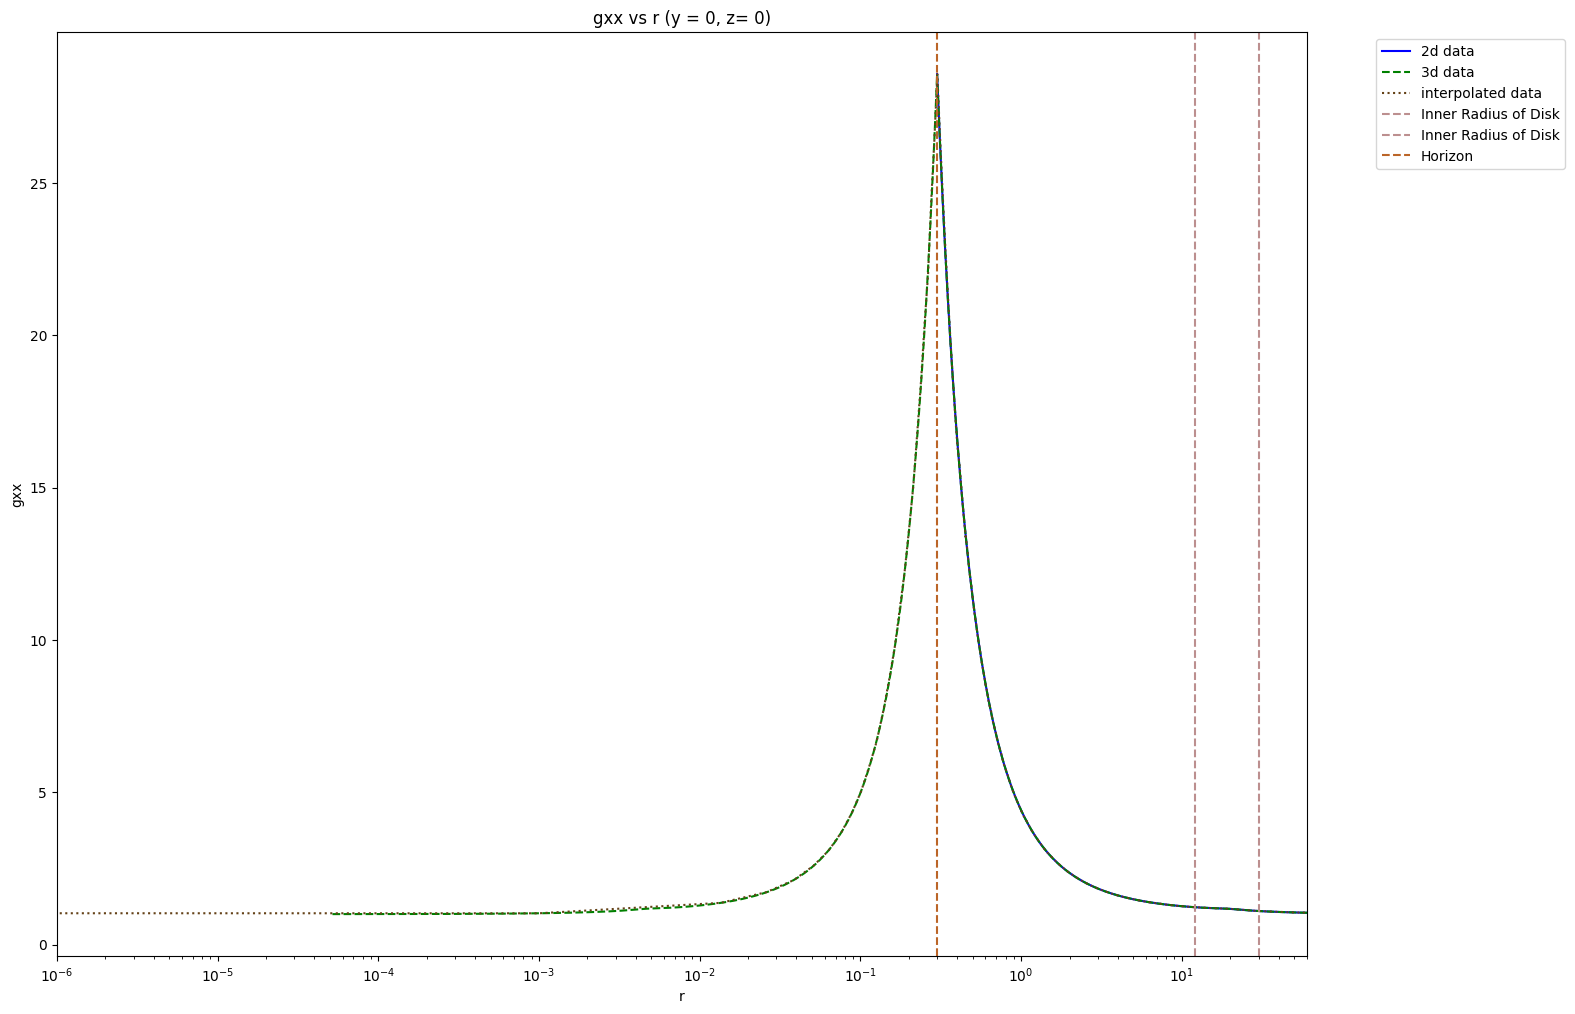

In [29]:
fig, ax = plt.subplots(figsize=(20,12))
plt.subplots_adjust(right=0.75)
plt.xlim(1e-6, 60)
plt.xscale('log')
#ax.plot(df_interpolated_xplane["x"], df_interpolated_xplane["rho"], color='#644117', label="interpolated data")
ax.plot(df_2d_1k_new_xplane["r"], df_2d_1k_new_xplane["gxx"], color='b', label="2d data")
ax.plot(df_3d_xplane["r"], df_3d_xplane["gxx"], color='g', linestyle="--", label="3d data")
ax.plot(df_interpolated_xplane["x"], df_interpolated_xplane["gxx"], color='#644117', linestyle=":", label="interpolated data")
ax.axvline(x=np.float64(12.0), color="#bc8f8f", linestyle="--", label="Inner Radius of Disk")
ax.axvline(x=np.float64(30.0), color="#bc8f8f", linestyle="--", label="Inner Radius of Disk")
ax.axvline(x=np.float64(0.3), color="#bb6528", linestyle="--", label="Horizon")
plt.xlabel("r")
plt.ylabel("gxx")
plt.title("gxx vs r (y = 0, z= 0)")
ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

plt.savefig("/data/sjammi6/thesisproject/data/interpolated_2d_3d_gxx.png")
plt.show()

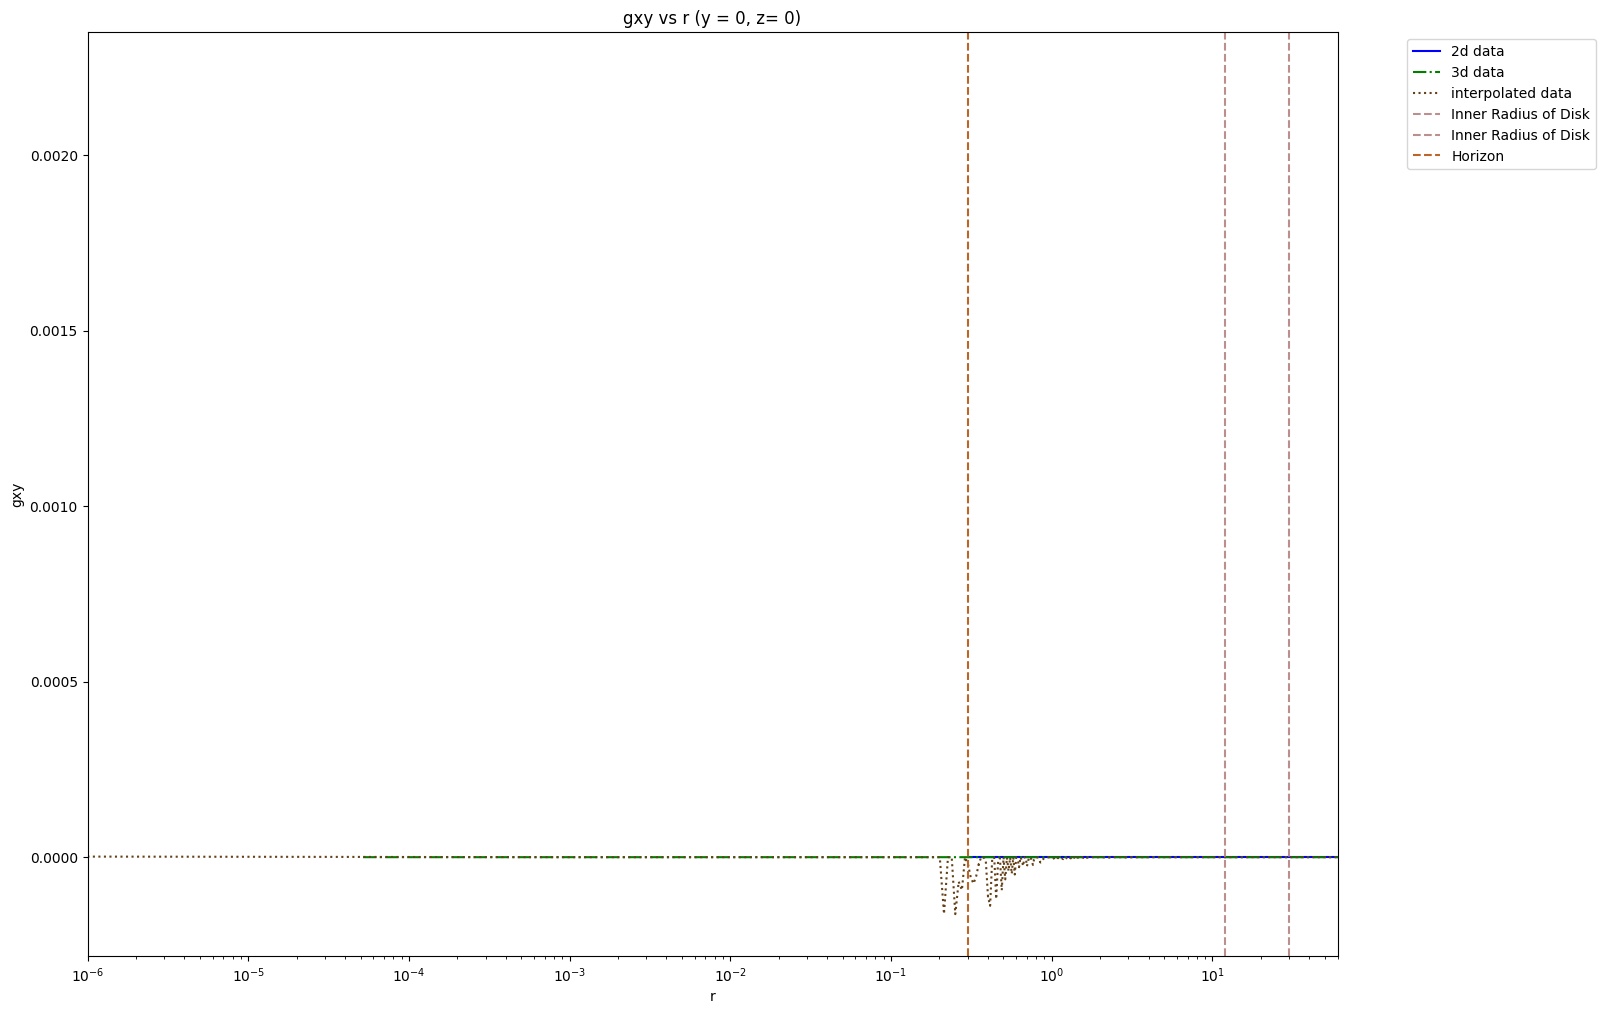

In [30]:
fig, ax = plt.subplots(figsize=(20,12))
plt.subplots_adjust(right=0.75)
plt.xlim(1e-6, 60)
plt.xscale('log')
#ax.plot(df_interpolated_xplane["x"], df_interpolated_xplane["rho"], color='#644117', label="interpolated data")
ax.plot(df_2d_1k_new_xplane["r"], df_2d_1k_new_xplane["gxy"], color='b', label="2d data")
ax.plot(df_3d_xplane["r"], df_3d_xplane["gxy"], color='g', linestyle="-.", label="3d data")
ax.plot(df_interpolated_xplane["x"], df_interpolated_xplane["gxy"], color='#644117', linestyle=":", label="interpolated data")
ax.axvline(x=np.float64(12.0), color="#bc8f8f", linestyle="--", label="Inner Radius of Disk")
ax.axvline(x=np.float64(30.0), color="#bc8f8f", linestyle="--", label="Inner Radius of Disk")
ax.axvline(x=np.float64(0.3), color="#bb6528", linestyle="--", label="Horizon")
plt.xlabel("r")
plt.ylabel("gxy")
plt.title("gxy vs r (y = 0, z= 0)")
ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

plt.savefig("/data/sjammi6/thesisproject/data/interpolated_2d_3d_gxy.png")
plt.show()

In [31]:
df_3d.columns

Index(['r', 'theta', 'phi', 'alpha', 'beta__x', 'beta__y', 'beta__z', 'psi',
       'gxx', 'gxy', 'gxz', 'gyy', 'gyz', 'gzz', 'Kxx', 'Kxy', 'Kxz', 'Kyy',
       'Kyz', 'Kzz', 'rho', 'u__x', 'u__y', 'u__z', 'A_x', 'A_y', 'A_z'],
      dtype='object')

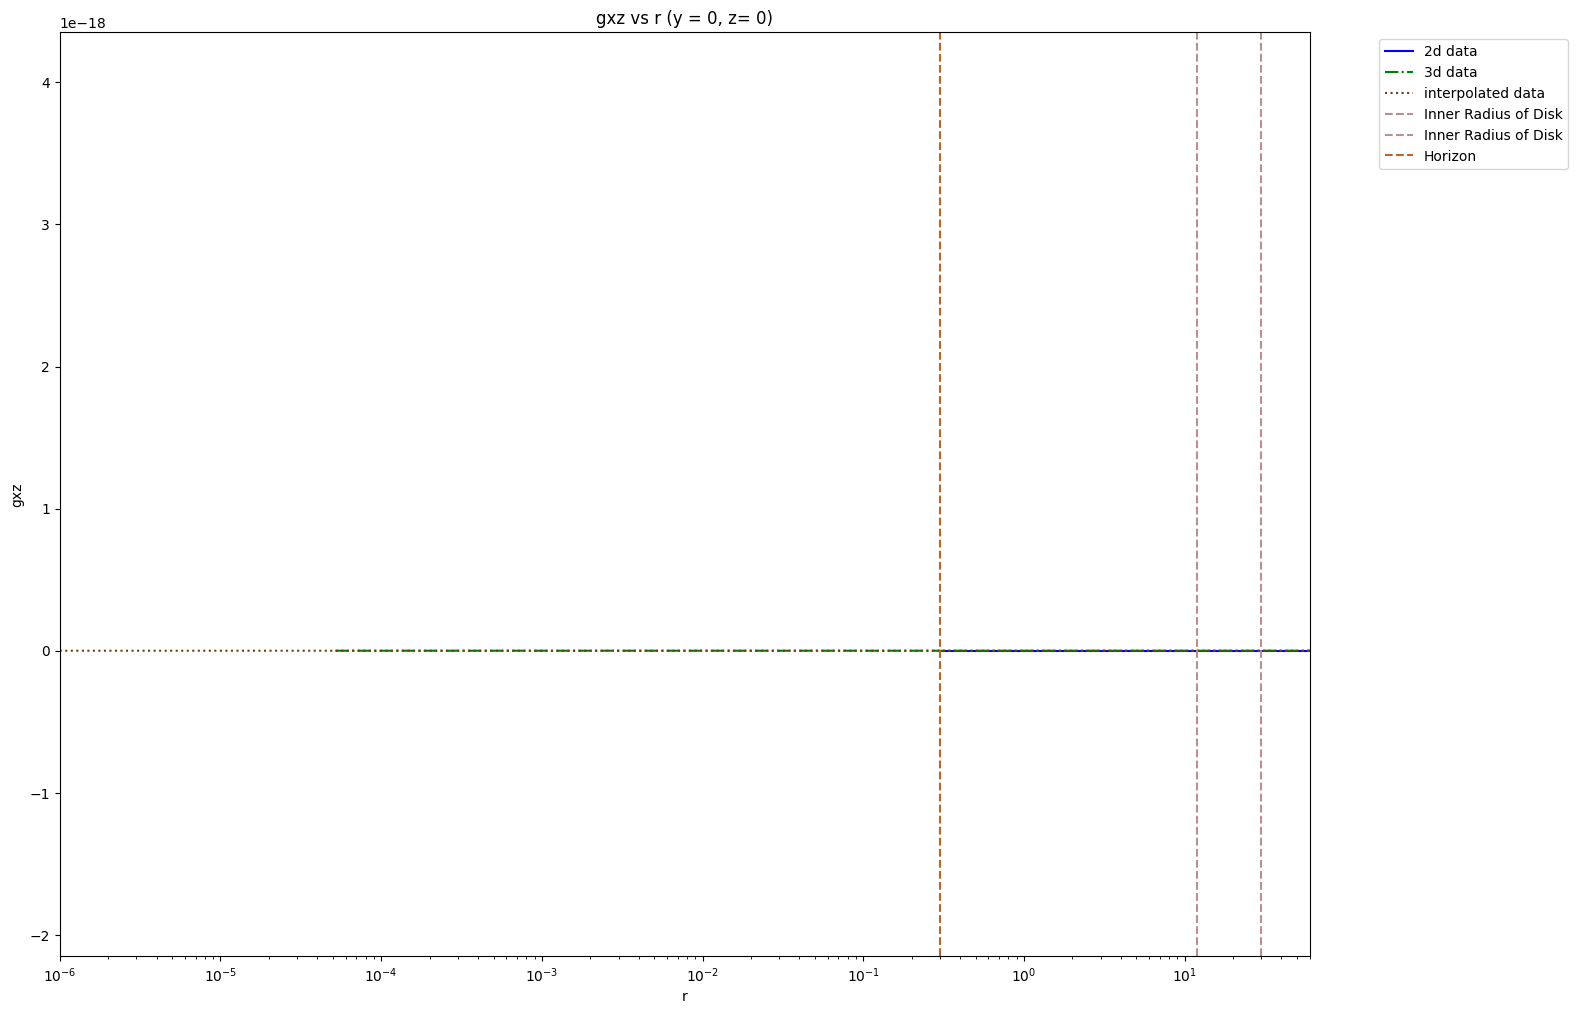

In [32]:
fig, ax = plt.subplots(figsize=(20,12))
plt.subplots_adjust(right=0.75)
plt.xlim(1e-6, 60)
plt.xscale('log')
#ax.plot(df_interpolated_xplane["x"], df_interpolated_xplane["rho"], color='#644117', label="interpolated data")
ax.plot(df_2d_1k_new_xplane["r"], df_2d_1k_new_xplane["gxz"], color='b', label="2d data")
ax.plot(df_3d_xplane["r"], df_3d_xplane["gxz"], color='g', linestyle="-.", label="3d data")
ax.plot(df_interpolated_xplane["x"], df_interpolated_xplane["gxz"], color='#644117', linestyle=":", label="interpolated data")
ax.axvline(x=np.float64(12.0), color="#bc8f8f", linestyle="--", label="Inner Radius of Disk")
ax.axvline(x=np.float64(30.0), color="#bc8f8f", linestyle="--", label="Inner Radius of Disk")
ax.axvline(x=np.float64(0.3), color="#bb6528", linestyle="--", label="Horizon")
plt.xlabel("r")
plt.ylabel("gxz")
plt.title("gxz vs r (y = 0, z= 0)")
ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

plt.savefig("/data/sjammi6/thesisproject/data/interpolated_2d_3d_gxz.png")
plt.show()

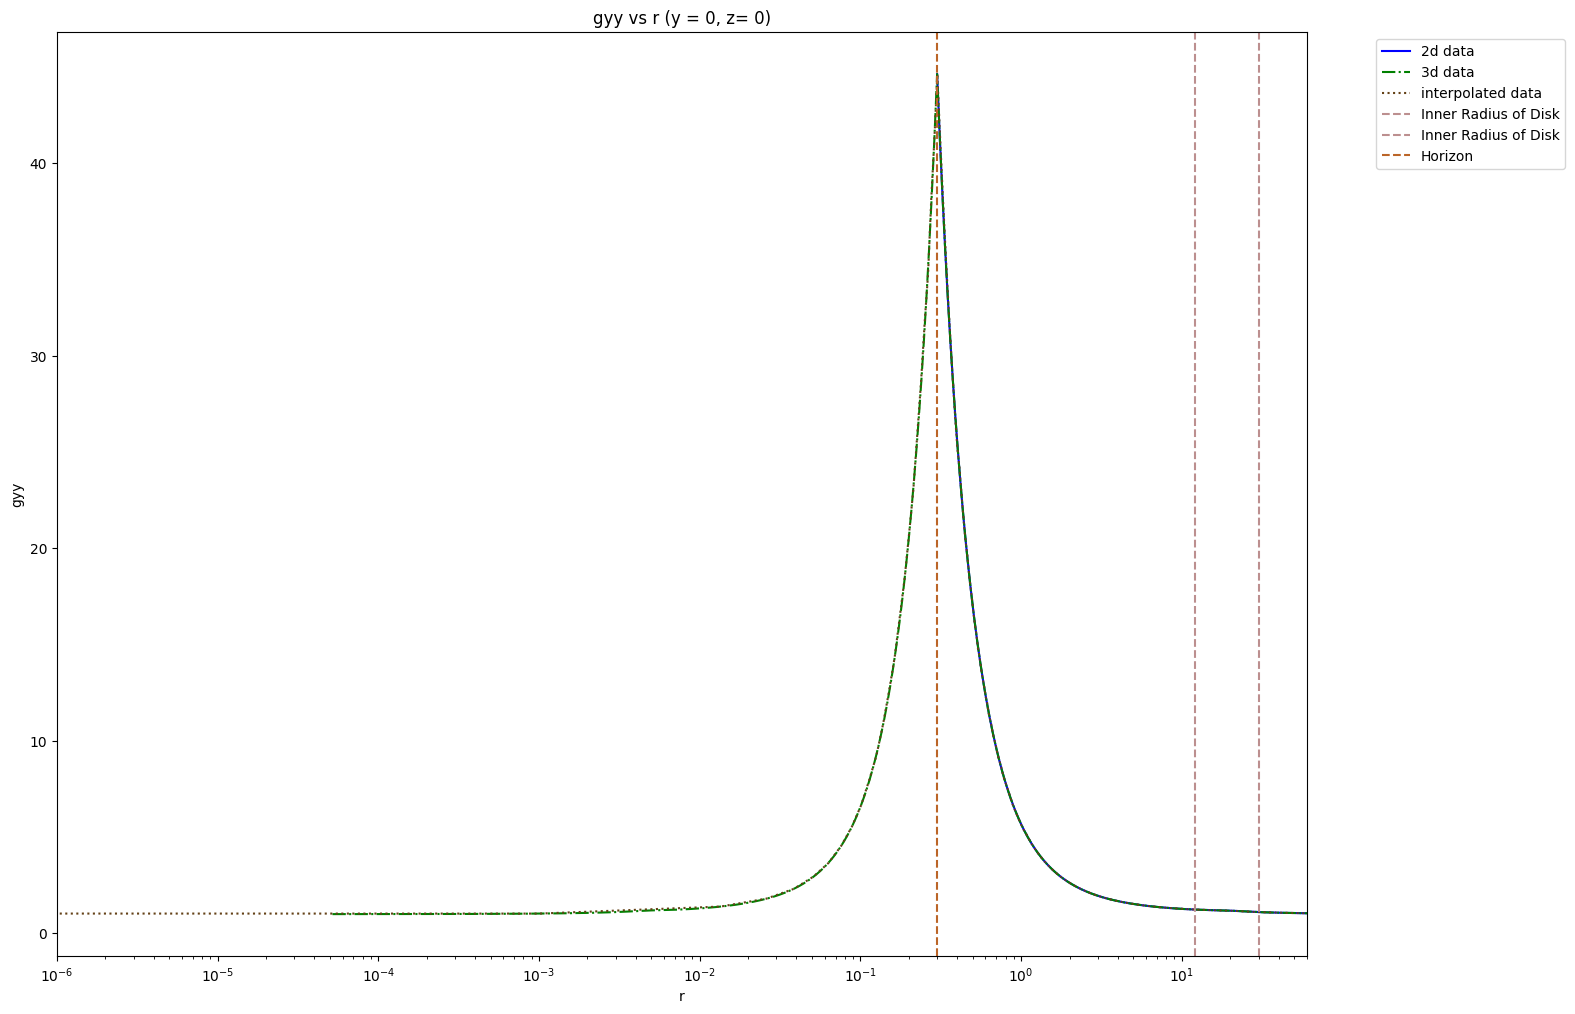

In [33]:
fig, ax = plt.subplots(figsize=(20,12))
plt.subplots_adjust(right=0.75)
plt.xlim(1e-6, 60)
plt.xscale('log')
#ax.plot(df_interpolated_xplane["x"], df_interpolated_xplane["rho"], color='#644117', label="interpolated data")
ax.plot(df_2d_1k_new_xplane["r"], df_2d_1k_new_xplane["gyy"], color='b', label="2d data")
ax.plot(df_3d_xplane["r"], df_3d_xplane["gyy"], color='g', linestyle="-.",  label="3d data")
ax.plot(df_interpolated_xplane["x"], df_interpolated_xplane["gyy"], color='#644117', linestyle=":", label="interpolated data")
ax.axvline(x=np.float64(12.0), color="#bc8f8f", linestyle="--", label="Inner Radius of Disk")
ax.axvline(x=np.float64(30.0), color="#bc8f8f", linestyle="--", label="Inner Radius of Disk")
ax.axvline(x=np.float64(0.3), color="#bb6528", linestyle="--", label="Horizon")
plt.xlabel("r")
plt.ylabel("gyy")
plt.title("gyy vs r (y = 0, z= 0)")
ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

plt.savefig("/data/sjammi6/thesisproject/data/interpolated_2d_3d_gyy.png")
plt.show()

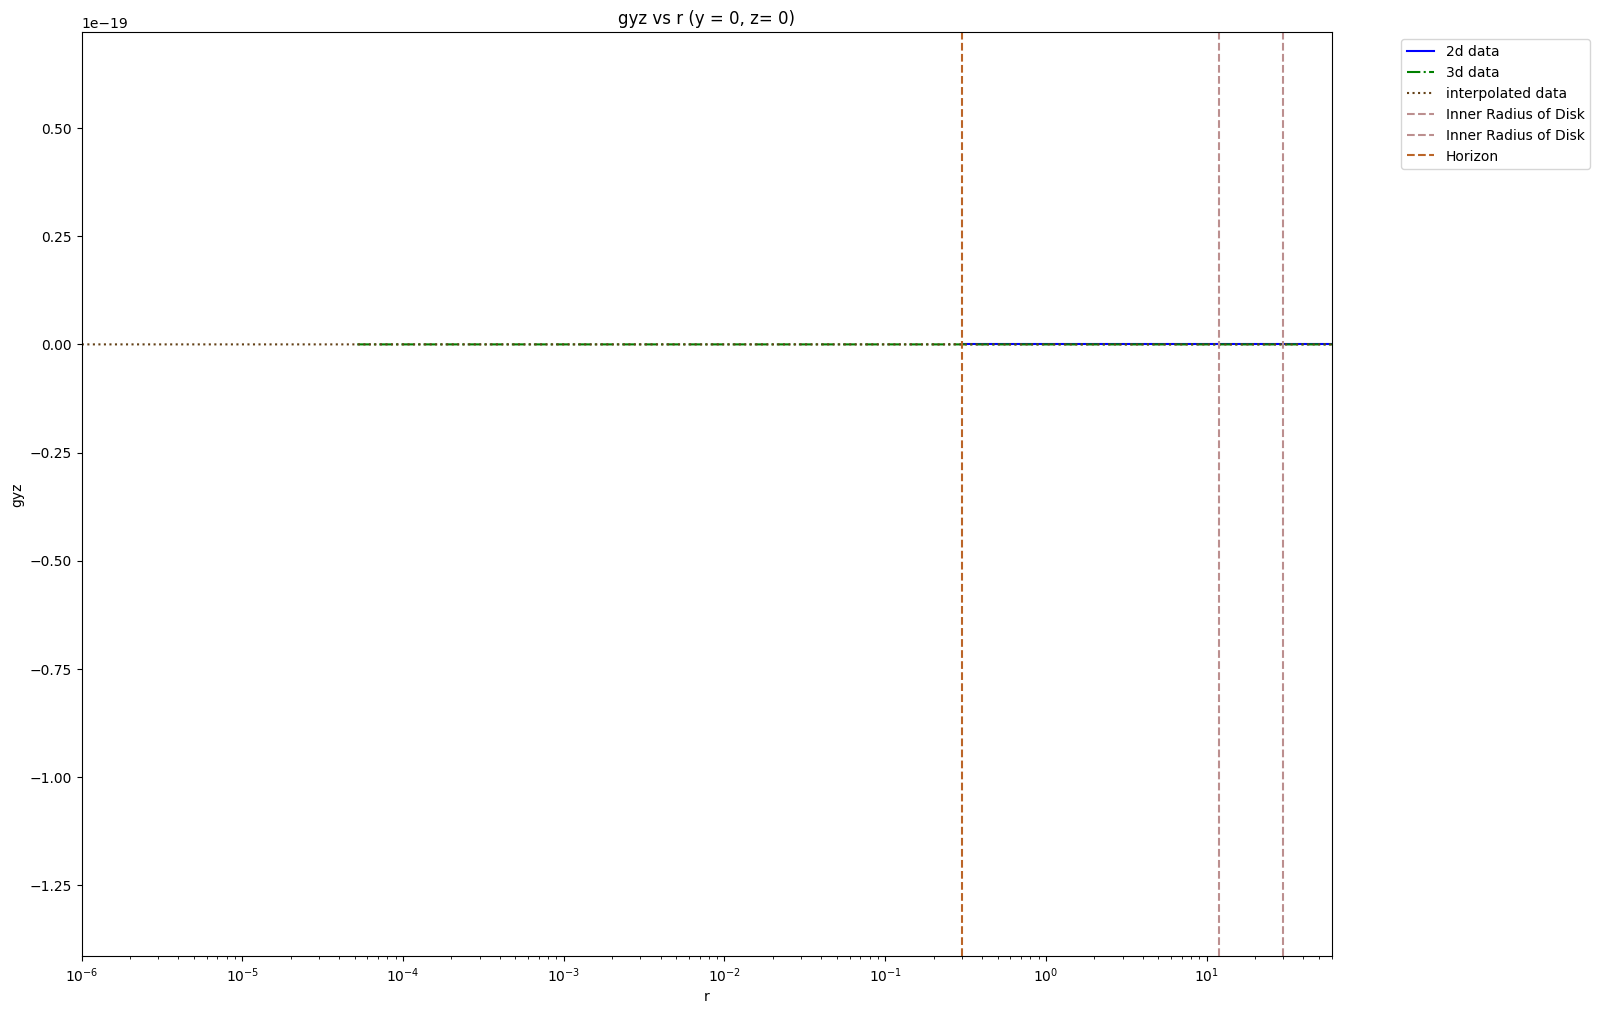

In [34]:
fig, ax = plt.subplots(figsize=(20,12))
plt.subplots_adjust(right=0.75)
plt.xlim(1e-6, 60)
plt.xscale('log')
#ax.plot(df_interpolated_xplane["x"], df_interpolated_xplane["rho"], color='#644117', label="interpolated data")
ax.plot(df_2d_1k_new_xplane["r"], df_2d_1k_new_xplane["gyz"], color='b', label="2d data")
ax.plot(df_3d_xplane["r"], df_3d_xplane["gyz"], color='g', linestyle="-.",  label="3d data")
ax.plot(df_interpolated_xplane["x"], df_interpolated_xplane["gyz"], color='#644117', linestyle=":", label="interpolated data")
ax.axvline(x=np.float64(12.0), color="#bc8f8f", linestyle="--", label="Inner Radius of Disk")
ax.axvline(x=np.float64(30.0), color="#bc8f8f", linestyle="--", label="Inner Radius of Disk")
ax.axvline(x=np.float64(0.3), color="#bb6528", linestyle="--", label="Horizon")
plt.xlabel("r")
plt.ylabel("gyz")
plt.title("gyz vs r (y = 0, z= 0)")
ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

plt.savefig("/data/sjammi6/thesisproject/data/interpolated_2d_3d_gyz.png")
plt.show()

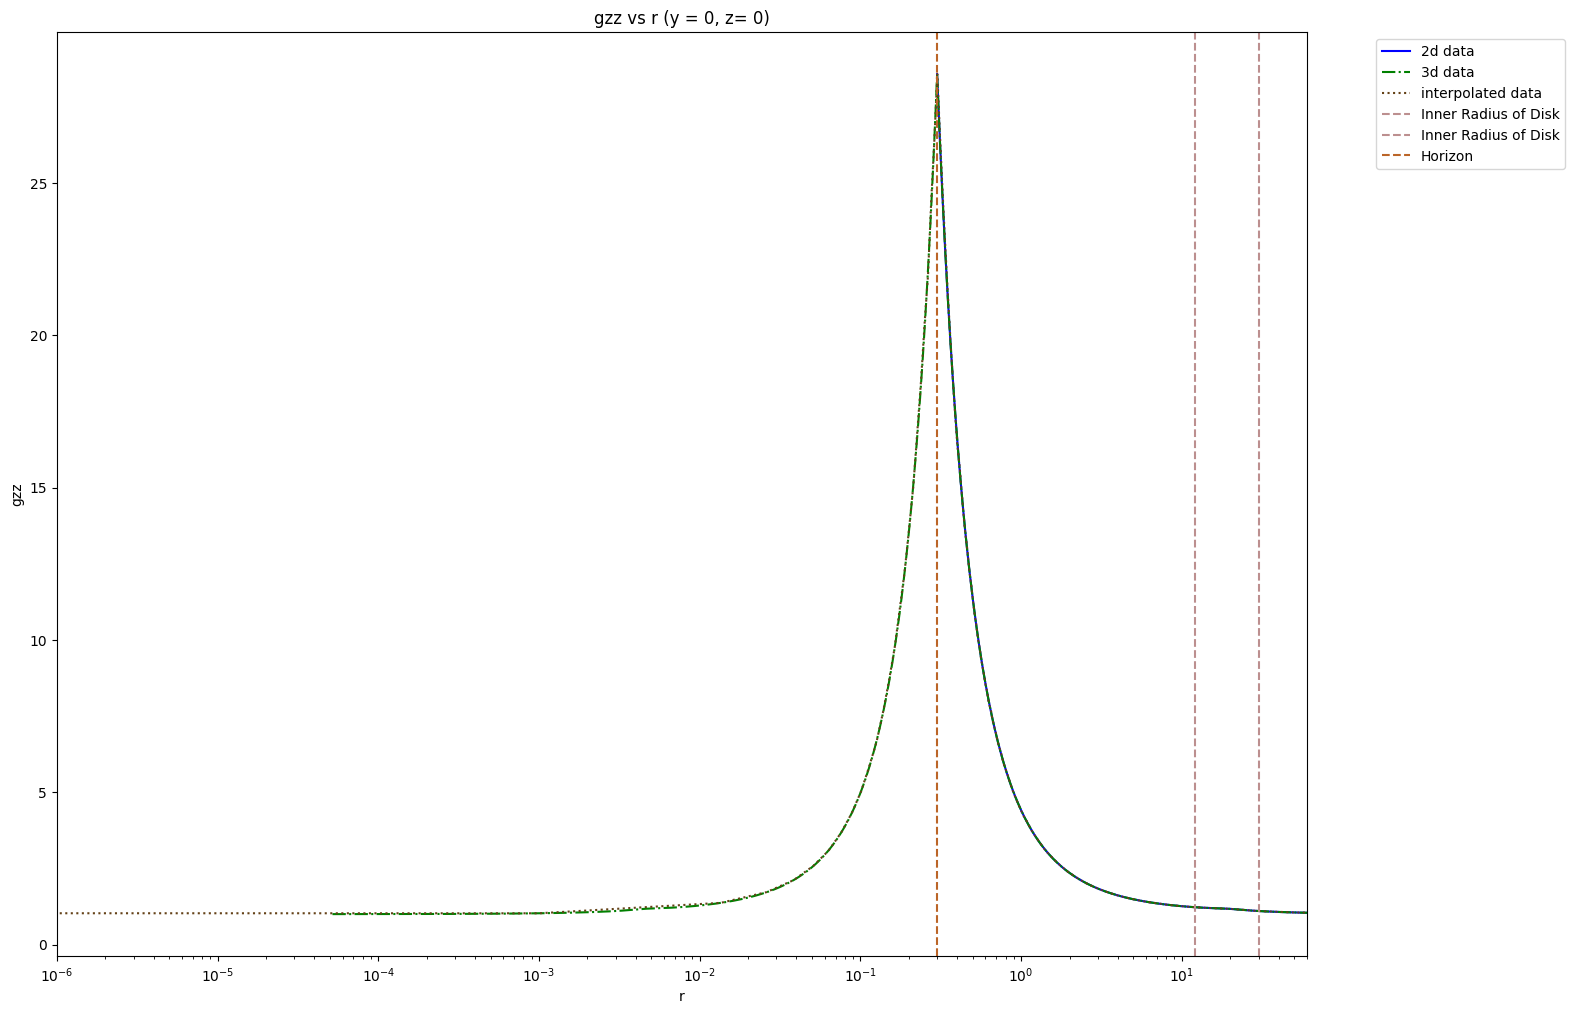

In [35]:
fig, ax = plt.subplots(figsize=(20,12))
plt.subplots_adjust(right=0.75)
plt.xlim(1e-6, 60)
plt.xscale('log')
#ax.plot(df_interpolated_xplane["x"], df_interpolated_xplane["rho"], color='#644117', label="interpolated data")
ax.plot(df_2d_1k_new_xplane["r"], df_2d_1k_new_xplane["gzz"], color='b', label="2d data")
ax.plot(df_3d_xplane["r"], df_3d_xplane["gzz"], color='g', linestyle="-.", label="3d data")
ax.plot(df_interpolated_xplane["x"], df_interpolated_xplane["gzz"], color='#644117', linestyle=":", label="interpolated data")
ax.axvline(x=np.float64(12.0), color="#bc8f8f", linestyle="--", label="Inner Radius of Disk")
ax.axvline(x=np.float64(30.0), color="#bc8f8f", linestyle="--", label="Inner Radius of Disk")
ax.axvline(x=np.float64(0.3), color="#bb6528", linestyle="--", label="Horizon")
plt.xlabel("r")
plt.ylabel("gzz")
plt.title("gzz vs r (y = 0, z= 0)")
ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

plt.savefig("/data/sjammi6/thesisproject/data/interpolated_2d_3d_gzz.png")
plt.show()